In [2]:
from models.model_utils import load_model
from models.unet import UNet
from data.data_utils import fetch_data
import matplotlib.pyplot as plt
import numpy as np

model = UNet().double()
load_model("../results/run_1/saved_model_unet9.pt", model)
data_paths = ['../data/training_data_12.npz']
train_loaders = fetch_data(data_paths, batchsize=1, shuffle=False)

setting up data


In [108]:
for train_loader in train_loaders:
    for i, data in enumerate(train_loader):
        if i == 103:
            inputs, labels = data[0], data[1]
            outputs = model(inputs)
            break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'fine solver (label)')

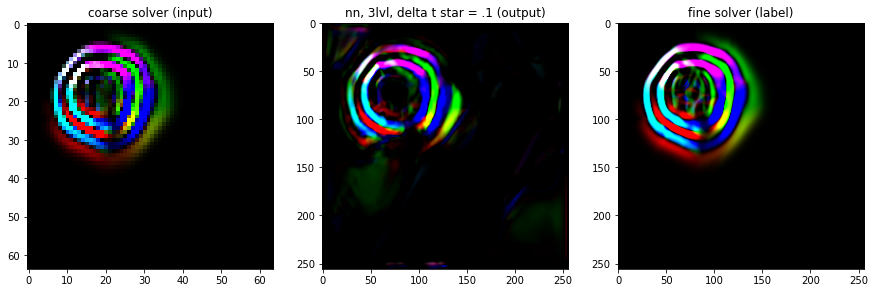

In [113]:
img_label = labels[0]
img_label = img_label.permute(1, 2, 0)
img_label = img_label
img_input = inputs[0][:3,:,:]
img_input = img_input.permute(1, 2, 0)
img_output = outputs[0]
img_output = img_output.permute(1, 2, 0)
f, ax = plt.subplots(1,3)
f.set_figheight(15)
f.set_figwidth(15)
ax[0].imshow(img_input.detach().numpy())
ax[0].set_title('coarse solver (input)')
ax[1].imshow(img_output.detach().numpy())
ax[1].set_title('nn relu, 3lvl, delta t star = .1 (output)')
ax[2].imshow(img_label.detach().numpy())
ax[2].set_title('fine solver (label)')